# üß™ Actividad Evaluada: √Årboles de Decisi√≥n en el Dataset Titanic

üìö **Curso:** Machine Learning

## üìù Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como c√≥digo y aseg√∫rate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentaci√≥n oficial de Python y Scikit-learn.

## üìÑ Descripci√≥n del Dataset
El dataset **Titanic** contiene informaci√≥n sobre los pasajeros del famoso barco Titanic que naufrag√≥ en 1912. El objetivo es predecir si un pasajero sobrevivi√≥ o no (`Survived` = 1 si sobrevivi√≥, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje autom√°tico como un primer ejemplo de clasificaci√≥n supervisada.

---

# üåä Actividad Evaluada: √Årboles de Decisi√≥n con el Dataset Titanic

En esta actividad aplicar√°s un modelo de √°rboles de decisi√≥n sobre el dataset Titanic.

### üéØ Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categ√≥ricas con One Hot Encoding
- Entrenar un √°rbol de decisi√≥n
- Visualizar el √°rbol
- Evaluar el desempe√±o del modelo

üïê Tiempo estimado: 60 a 90 minutos

In [3]:
# üì• Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## üîç 1. Exploraci√≥n inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta secci√≥n, deber√°s realizar una exploraci√≥n b√°sica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estad√≠sticas descriptivas de las variables num√©ricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitir√°n decidir qu√© pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta secci√≥n, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [4]:
# Mostrar la informaci√≥n general del dataset
df.info()

# Calcular y mostrar estad√≠sticas descriptivas de las variables num√©ricas
print(df.describe())

# Revisar la cantidad de valores nulos en cada columna
print(df.isnull().sum())

# Observaciones:
# - La informaci√≥n de df.info() nos muestra la cantidad de entradas, tipos de datos y si existen valores nulos.
# - df.describe() permite identificar el rango, media, desviaci√≥n est√°ndar y percentiles de las variables num√©ricas.
# - La funci√≥n df.isnull().sum() ayuda a identificar columnas con valores faltantes, lo que es cr√≠tico para decidir los pasos de imputaci√≥n o eliminaci√≥n.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    

## üßπ 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan informaci√≥n √∫til al modelo o contienen datos dif√≠ciles de procesar autom√°ticamente (como texto libre o demasiados valores √∫nicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, as√≠ que puedes usar la **moda** (valor m√°s frecuente) para completarlos.

3. **Codificaci√≥n de variables categ√≥ricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categ√≥ricas como `Sex` y `Embarked`, transform√°ndolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ‚ö†Ô∏è **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempe√±o del algoritmo.

Al finalizar esta etapa, deber√≠as tener un dataset **limpio, sin valores nulos y completamente num√©rico**.

In [6]:
# Eliminar columnas innecesarias
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Manejo de valores faltantes
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

# Codificaci√≥n de variables categ√≥ricas con One Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Embarked'], drop_first=True)

# Mostrar las primeras filas para verificar los cambios
df_clean.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True

## üß† 3. Entrenamiento del modelo de √Årbol de Decisi√≥n

En esta etapa, construiremos un modelo predictivo utilizando un **√Årbol de Decisi√≥n**, una t√©cnica de clasificaci√≥n que divide los datos en ramas sucesivas para tomar decisiones basadas en las caracter√≠sticas del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` ser√° nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una divisi√≥n, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el par√°metro `max_depth` para limitar la profundidad del √°rbol y evitar sobreajuste.

Cuando termines esta secci√≥n, tu modelo estar√° entrenado y listo para ser evaluado y visualizado.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Separar las variables predictoras (X) y la variable objetivo (y)
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

# 2. Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo con DecisionTreeClassifier (limitando la profundidad)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## üå≥ 4. Visualizaci√≥n del √°rbol

Una de las grandes ventajas de los √°rboles de decisi√≥n es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretaci√≥n del modelo**.

En esta secci√≥n usaremos la funci√≥n `plot_tree()` de `sklearn` para graficar el √°rbol entrenado. En el gr√°fico:

- Cada **nodo interno** representa una condici√≥n de decisi√≥n sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisi√≥n (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cu√°ntas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los par√°metros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del √°rbol. Aseg√∫rate de usar `plt.figure(figsize=(ancho, alto))` para que la visualizaci√≥n no se corte.

**Objetivo:** Entender c√≥mo el modelo est√° tomando decisiones, qu√© variables usa y con qu√© prioridad.

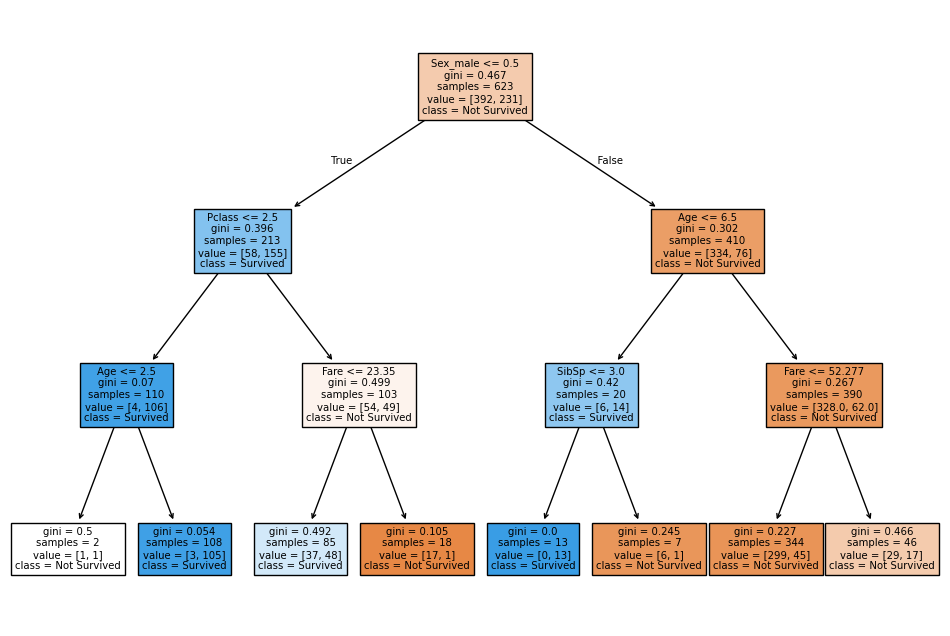

In [8]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

## üìà 5. Evaluaci√≥n del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempe√±o** para entender qu√© tan bien est√° funcionando. En esta secci√≥n usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular m√©tricas que nos ayuden a juzgar la calidad de las predicciones.

### M√©tricas que utilizaremos:

- **Matriz de confusi√≥n (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es √∫til para entender errores espec√≠ficos del modelo.
- **Reporte de clasificaci√≥n (`classification_report`)**: incluye precisi√≥n (*precision*), exhaustividad (*recall*), y la m√©trica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qu√© porcentaje total de predicciones fue correcto.

Estas m√©tricas te permitir√°n **identificar si el modelo est√° desbalanceado**, si tiende a predecir m√°s una clase que otra, y si necesita ajustes en par√°metros o preprocesamiento.

> üí° Recuerda: un modelo con buena precisi√≥n pero bajo *recall* puede ser problem√°tico si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Obtener predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las m√©tricas
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar las m√©tricas
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[139  18]
 [ 33  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8097014925373134


---
## ü§î Preguntas de Reflexi√≥n

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?

2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?

3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?

4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?

5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?


**1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?**

se puede observar que las variables que mas afectaban a la supervivencia eran el sexo y la clase del pasajero, ya que las mujeres y los pasajeros de primera clase ten√≠an una mayor probabilidad de sobrevivir. Tambi√©n se puede observar que la" pclass" y el "sexo",
ya que se puede establecer que la union de estas, podia m√°s o menos predecir la supervivencia, donde si era hombre y de primera clase, es bastante probable que sobreviviera.

**2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?**

Si no se controla su profundidad, el √°rbol puede volverse muy complejo y ajustarse en exceso a los datos de entrenamiento (sobreajuste). Esto afecta negativamente su capacidad para generalizar a datos nuevos y tambi√©n puede dificultar la interpretaci√≥n del modelo.

**3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?**

La codificaci√≥n ordinal asigna un n√∫mero entero a cada categor√≠a, lo que puede inducir al modelo a interpretar un orden l√≥gico o num√©rico entre ellas, incluso si no existe (por ejemplo, asignar 0, 1 y 2 a categor√≠as sin jerarqu√≠a real). En cambio, One Hot Encoding crea columnas binarias independientes para cada categor√≠a, evitando supuestos de orden y permitiendo una representaci√≥n m√°s neutral de variables nominales.

**4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?**

Considerar el uso de modelos ensemble (como Random Forest) para mejorar la generalizacion

**5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?**

En su forma actual, no recomendar√≠a implementar este modelo directamente en un entorno real. Antes de desplegarlo, ser√≠a necesario realizar ajustes para mejorar su precisi√≥n y robustez, como la optimizaci√≥n de hiperpar√°metros, validaci√≥n cruzada y la incorporaci√≥n de enfoques ensemble para reducir el sobreajuste. Adem√°s, es fundamental garantizar la calidad y consistencia de los datos, implementar un sistema de monitorizaci√≥n constante y actualizar el modelo seg√∫n sea necesario. Finalmente, se debe evaluar y mitigar posibles sesgos para asegurar que el modelo opere de manera √©tica y justa en producci√≥n.